In [1]:
import numpy as np
import matplotlib.pyplot as plt

from model import OpinionModel
import networkx as nx

SEED = 77
np.random.seed(SEED)

In [2]:
nodes_number = 100

G = nx.erdos_renyi_graph(nodes_number, p=0.1, seed=SEED, directed=False)
# nx.draw(G, node_size=100, node_color='k', width=0.1); plt.show()

In [12]:
x0 = np.random.uniform(low=-1.0, high= 1.0, size=nodes_number)

# plt.hist(x0); plt.show()

In [13]:
om = OpinionModel(G=G)

res = om.model(alpha=0.6, T=200, x0=x0)

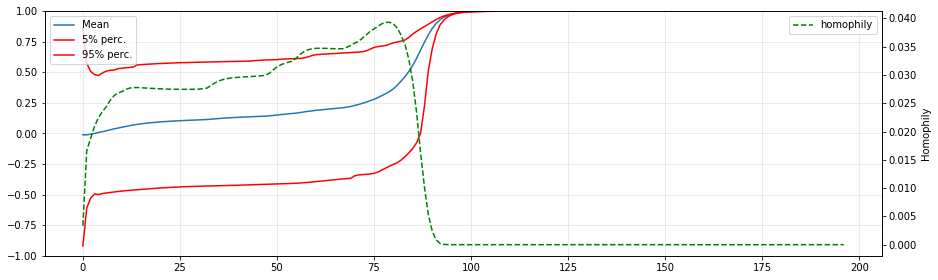

In [14]:
om.plot_results(res);

In [20]:
time_moment = -1  # posledni chvile
# om.plot_graph(x=res[time_moment, :, 0])

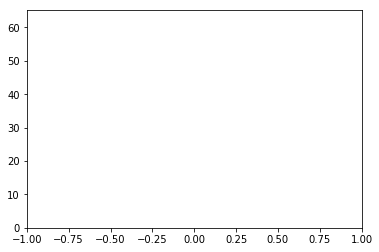

In [16]:
plt.hist(res[time_moment, :, 0]); plt.xlim((-1, 1));

## Investigation

In [2]:
nodes_number = 1000
G = nx.erdos_renyi_graph(nodes_number, p=0.99, seed=SEED, directed=False)

n_samples = 50
results = np.zeros(shape=[n_samples, n_samples])  # ruzne x0, ruzne alphy
variance = np.zeros(shape=[n_samples, n_samples])  # ruzne x0, ruzne alphy

om = OpinionModel(G=G)

alphas = np.linspace(0, 1, results.shape[1])
for i, _ in enumerate(range(results.shape[0])):
    x0 = np.random.uniform(low=-1.0, high= 1.0, size=nodes_number)

    for j, a in enumerate(alphas):
        res = om.model(alpha=a, T=500, x0=x0)
        results[i, j] = res[-1, :, 0].mean()
        variance[i, j] = res[-1, :, 0].std()
        
#np.savetxt("results1000p99.txt", results)
#np.savetxt("variance1000p99.txt", variance)

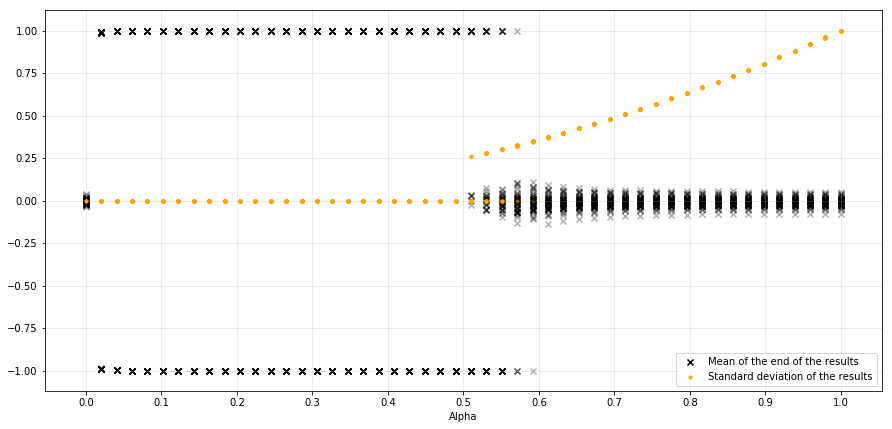

In [3]:
plt.figure(figsize=(15, 7))
for i in range(results.shape[0]):
    plt.scatter(alphas, results[i, :], color='k', alpha=0.3, marker='x')
    plt.scatter(alphas, variance[i,:], marker=".", alpha=0.3, c="orange")

#, label='Standard deviation of the results'
#label='Standard deviation of the results'
plt.scatter(alphas, results[0, :], color='k', alpha=1.0, marker='x', label ='Mean of the end of the results')
plt.scatter(alphas, variance[0,:], marker=".", alpha=1.0, c='orange', label='Standard deviation of the results')

plt.xlabel('Alpha')
#plt.ylabel('Mean of the end of the result')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(alpha=0.3)

#plt.savefig("n1000,p0099+v.png", dpi=500)
plt.show()

In [7]:
np.savetxt("results1000p003.txt", results)
np.savetxt("variance1000p003.txt", variance)